# Project Report: Income Prediction and Sentiment Analysis

## Data Preparation and Preprocessing

Pandas was used to import bank customer data into Jupyter notebook. It was done before the study. A first inspection of the data showed a column called "ID," which was unhelpful and was immediately eliminated to eliminate unnecessary information. One-hot encoding was also used to represent categorical attributes like education and account ownership. This improvement allowed regression and neural network algorithms to understand non-numerical data.

After that, the Interquartile Range (IQR) method was used to remove Mortgage(Thousands) column outliers. This step reduced noise that could disrupt model learning to ensure a cleaner and more robust training dataset. The feature distributions were normalized by scaling the data with StandardScaler. This is crucial to enhancing neural network performance, especially when features vary greatly.

The dataset was cleaned and updated before being split into training and testing sets. This allowed proper model evaluation on unreleased data.

## Regression and Neural Network Modeling

Two models were utilized in order to make a prediction regarding the Income(Thousands) variable. These models included a feedforward Neural Network and a conventional Linear Regression model. The linear model was used as a baseline, and it achieved a Mean Squared Error (MSE) value of 874.21. However, despite the fact that this performance was satisfactory, it brought to light shortcomings in the ability to capture complicated relationships within the data.

After that, TensorFlow and Keras were utilized in order to build a Neural Network that was advanced in its capabilities. The architecture was trained over a period of ten epochs and consisted of many dense layers that were activated by ReLU. This initial model demonstrated the value of non-linear learning capabilities by displaying a lower MSE of 785.77 when compared to the original model.

An additional phase of hyperparameter tweaking was performed with the help of a bespoke wrapper that was compatible with GridSearchCV in order to further increase performance. For this reason, it was possible to systematically optimize both the batch size and the optimizer type. The model that performed the best utilized the Adam optimizer with a batch size of 128, which resulted in a marginally improved MSE of 780.17 after the optimization process. In spite of the fact that deep learning gives advantages, the dataset may be either simple or too large to fully utilize the capabilities of neural networks, as indicated by the marginal gains.

Following careful consideration, the neural network model was selected as the ultimate predictive algorithm due to the fact that it possesses higher accuracy and versatility. Because it was able to simulate non-linear interactions, it was better equipped to capture the underlying patterns that were affecting the income of customers.

## Income Prediction for a New Customer

To demonstrate the predictive capability of the finalized neural network model, a hypothetical customer profile was constructed. The profile was based on a 45-year-old individual with 20 years of experience, a mortgage of $150,000, a credit score of 700, and other personal and banking features set appropriately.

This new data point was processed using the same one-hot encoding structure and standardization scaler applied to the training data. When passed through the optimized neural network model, the predicted income for the customer was $13,029.01 (in thousands), or approximately $13 million, which seems extraordinarily high. This suggests potential issues with the scale or structure of the original target variable and may warrant further data validation or log transformation for better interpretability.

## Sentiment and Semantic Analysis of YouTube Comments

The project also included a semantic analysis component to examine viewer sentiment from a YouTube video about India-Pakistan conflict. A total of 100 top comments were extracted using the YoutubeCommentDownloader library. The text data underwent thorough cleaning, including removing URLs, punctuation, digits, and converting text to lowercase for uniformity.

Using the TextBlob library, the comments were classified into three sentiment categories: positive, neutral, and negative. Based on the analysis, it was determined that the bulk of the comments were neither positive nor negative, followed by neutral comments. This shows that the viewers were primarily passive or informational in tone, rather than emotionally charged, during the presentation, despite the fact that the subject matter was sensitive.

In addition to this, an emotion classification was carried out with the help of a HuggingFace transformer model that had been pre-trained (j-hartmann/emotion-english-distilroberta-base). Despite the fact that certain comments were returned with a 'unknown' classification due to their brevity or the absence of emotional markers, this model nevertheless supplied a rich emotional context that went beyond basic sentiment.

A bar chart was used to represent the distribution of sentiment, and it was able to clearly demonstrate that neutral sentiment was the predominant sentiment. A word cloud was also created in order to illustrate the words that were used the most frequently throughout all of the comments. The political and conflict-related aspect of the video content was reflected in the use of notable terms such as "war," "india," "pakistan," "modi," and "attack." These particular words contribute to the reinforcement of the context of the conversation as well as the types of feelings that are likely to be expressed.



## Conclusion and Final Thoughts

This project combined structured income prediction and unstructured sentiment analysis to explore both numerical and textual data. In the regression task, while linear regression provided a useful baseline, the neural network outperformed it in terms of MSE and adaptability. The income prediction for a new customer further validated the model's applicability in a real-world scenario, although scale issues may need further investigation.

On the semantic analysis front, the integration of classical sentiment scoring and transformer-based emotion recognition allowed for a rich understanding of viewer opinions and emotional tone. Visualization techniques such as bar charts and word clouds helped to summarize the findings effectively.

# PROJECT CODE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = pd.read_csv("/content/BankRecords.csv")
data.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [ ]:
data.isna().sum()

,0
ID,0
Age,0
Experience(Years),0
Income(Thousands's),0
Sort Code,0
Family,0
Credit Score,0
Education,0
Mortgage(Thousands's),0
Personal Loan,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [ ]:
data = data.drop(['ID'], axis = 1)

In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Print unique values in each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print()

Unique values in 'Education':
['Diploma' 'Degree' 'Masters']

Unique values in 'Personal Loan':
['No' 'Yes']

Unique values in 'Securities Account':
['Yes' 'No']

Unique values in 'CD Account':
['No' 'Yes']

Unique values in 'Online Banking':
['No' 'Yes']

Unique values in 'CreditCard':
['No' 'Yes']



In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=False)

# Preview the resulting dataframe
df_encoded.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's),Education_Degree,Education_Diploma,Education_Masters,Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes
0,25,1,49,91107,4,1.6,0,False,True,False,True,False,False,True,True,False,True,False,True,False
1,45,19,34,90089,3,1.5,0,False,True,False,True,False,False,True,True,False,True,False,True,False
2,39,15,11,94720,1,1.0,0,False,True,False,True,False,True,False,True,False,True,False,True,False
3,35,9,100,94112,1,2.7,0,True,False,False,True,False,True,False,True,False,True,False,True,False
4,35,8,45,91330,4,1.0,0,True,False,False,True,False,True,False,True,False,True,False,False,True


In [ ]:
df_encoded.describe()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [ ]:
# Rename columns
df_encoded = df_encoded.rename(columns={
    'Experience(Years)': 'Experience_Years',
    'Income(Thousands\'s)': 'Income_Thousands',
    'Mortgage(Thousands\'s)': 'Mortgage_Thousands'
})


In [ ]:
# Calculate Q1 and Q3 for the 'mortgage' column
Q1 = df_encoded['Mortgage_Thousands'].quantile(0.25)
Q3 = df_encoded['Mortgage_Thousands'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df_encoded[(df_encoded['Mortgage_Thousands'] >= lower_bound) & (df_encoded['Mortgage_Thousands'] <= upper_bound)]

# reset index
df_no_outliers.reset_index(drop=True, inplace=True)

df_no_outliers.head()

,Age,Experience_Years,Income_Thousands,Sort Code,Family,Credit Score,Mortgage_Thousands,Education_Degree,Education_Diploma,Education_Masters,Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes
0,25,1,49,91107,4,1.6,0,False,True,False,True,False,False,True,True,False,True,False,True,False
1,45,19,34,90089,3,1.5,0,False,True,False,True,False,False,True,True,False,True,False,True,False
2,39,15,11,94720,1,1.0,0,False,True,False,True,False,True,False,True,False,True,False,True,False
3,35,9,100,94112,1,2.7,0,True,False,False,True,False,True,False,True,False,True,False,True,False
4,35,8,45,91330,4,1.0,0,True,False,False,True,False,True,False,True,False,True,False,False,True


In [ ]:
# Features and target
X = df_no_outliers.drop(['Income_Thousands'], axis = 1)  # Use features to predict income
y = df_no_outliers['Income_Thousands']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Mean Squared Error: {mse_lr}")


Linear Regression Mean Squared Error: 874.2131491804886


In [ ]:
# Initialize the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Single output for regression

# Compile the model
nn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn}")


Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4980.0610 - val_loss: 948.6158
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 942.0838 - val_loss: 865.5397
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 911.3528 - val_loss: 855.4784
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 915.6329 - val_loss: 853.0549
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 824.7938 - val_loss: 828.1390
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 872.8024 - val_loss: 809.0990
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 839.5305 - val_loss: 797.8123
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 836.8551 - val_loss: 805.6031
Epoch 9/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 834.4242 - val_loss: 788.9099
Epoch 10/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 828.1318 - val_loss: 785.7742
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Mean Squared Error: 785.7743530273438


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error

# Define the function to create the neural network model
def create_nn_model(optimizer='adam', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create a custom scikit-learn wrapper class for Keras
class KerasRegressorCustom(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn=None, optimizer='adam', neurons=64, epochs=100, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.neurons = neurons
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def fit(self, X, y):
        self.model = self.build_fn(optimizer=self.optimizer, neurons=self.neurons)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Wrap the model with KerasRegressorCustom for use in GridSearchCV
nn_model = KerasRegressorCustom(build_fn=create_nn_model, epochs=100, batch_size=32, verbose=0)

# Define the parameter grid for GridSearchCV
param_grid_nn = {
    'optimizer': ['adam', 'rmsprop'],  # Optimizer types
    'batch_size': [64, 128],  # Batch size
}

# Perform GridSearchCV with cross-validation
grid_search_nn = GridSearchCV(estimator=nn_model, param_grid=param_grid_nn,
                              cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search_nn.fit(X_train_scaled, y_train)

# Best parameters and model performance
print(f"Best hyperparameters for Neural Network: {grid_search_nn.best_params_}")
best_nn_model = grid_search_nn.best_estimator_

# Predict on the test set
y_pred_nn = best_nn_model.predict(X_test_scaled)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network Mean Squared Error: {mse_nn}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Best hyperparameters for Neural Network: {'batch_size': 128, 'optimizer': 'adam'}
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Mean Squared Error: 780.1737060546875


In [ ]:
new_customer = {
    'Age': 45,
    'Experience_Years': 20,
    'Sort Code': 1010,
    'Family': 3,
    'Credit Score': 700,
    'Mortgage_Thousands': 150,
    'Education_Degree': 1,
    'Education_Diploma': 0,
    'Education_Masters': 0,
    'Personal Loan_No': 0,
    'Personal Loan_Yes': 1,
    'Securities Account_No': 1,
    'Securities Account_Yes': 0,
    'CD Account_No': 1,
    'CD Account_Yes': 0,
    'Online Banking_No': 0,
    'Online Banking_Yes': 1,
    'CreditCard_No': 0,
    'CreditCard_Yes': 1
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Apply the same scaler used on the training data
new_customer_scaled = scaler.transform(new_customer_df)

predicted_income = best_nn_model.predict(new_customer_scaled)
print(f"Predicted Income (in Thousands): {predicted_income[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Income (in Thousands): 13029.01


## Semantic Analysis

In [ ]:
from itertools import islice
from youtube_comment_downloader import *
import pandas as pd

# Initialize the downloader
downloader = YoutubeCommentDownloader()

# Fetch top 10 popular comments
comments = downloader.get_comments_from_url(
    'https://www.youtube.com/watch?v=PuSQPHOJXNY'
)

# Convert to list of dictionaries (each comment is a dict)
comment_list = list(islice(comments, 100))

# Create DataFrame
df = pd.DataFrame(comment_list)

# Display the DataFrame
print(df.head())


                          cid  \
0  UgyxFEek_4aSqvSUaAt4AaABAg   
1  UgyGm6gLfVA8OY5gyVF4AaABAg   
2  Ugw6p_sICn6KKUUoJeR4AaABAg   
3  UgzY0d7nRuOPSxcruLJ4AaABAg   
4  UgxMregZAF-UCZFaol14AaABAg   

                                                text         time  \
0  Why would the hunter highlight who and how it ...   1 hour ago   
1  So far no war breaks out which is good for bot...  2 hours ago   
2  As someone who lives right next to India, I pr...  3 hours ago   
3           Pakistan will win against the polytheist  3 hours ago   
4  One thing I realized about India  is that  it'...  6 hours ago   

                    author                   channel votes replies  \
0  @khamlianmangshoute4018  UC125omwj0xMrBYBjD4oCZrQ     0           
1         @mahdiismail8853  UC_ciZrlDSDD2-b47kD9PO_w     0           
2            @Tunner-T5263  UCjEdEu-59YUKDNGY3aprYiQ     0           
3         @BashimoyMucalim  UCHsPJ3Yqk0uH_bfm6y8FFCw     0           
4            @Emotion-3642  UCnSnuhb

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import re
import nltk
from transformers import pipeline

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
<ipython-input-18-3ce0c065694b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2', order=['Positive', 'Neutral', 'Negative'])


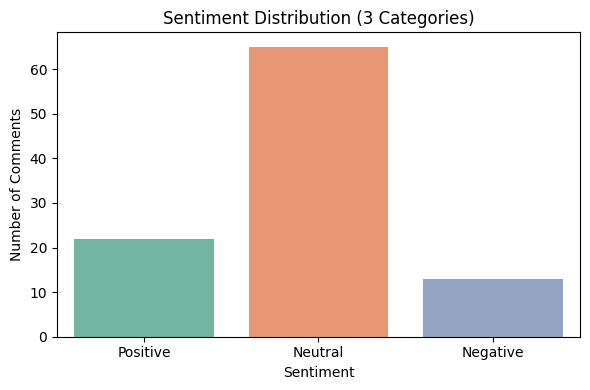

In [ ]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation & digits
    text = text.lower()  # lowercase
    return text.strip()

df['clean_text'] = df['text'].astype(str).apply(clean_text)

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['clean_text'].apply(get_sentiment)

emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=1)

def classify_emotion(text):
    try:
        result = emotion_model(text)[0]
        return result['label']
    except:
        return 'unknown'

# Apply only to non-empty cleaned texts
df['Emotion'] = df['clean_text'].apply(lambda x: classify_emotion(x) if len(x) > 3 else 'unknown')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution (3 Categories)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


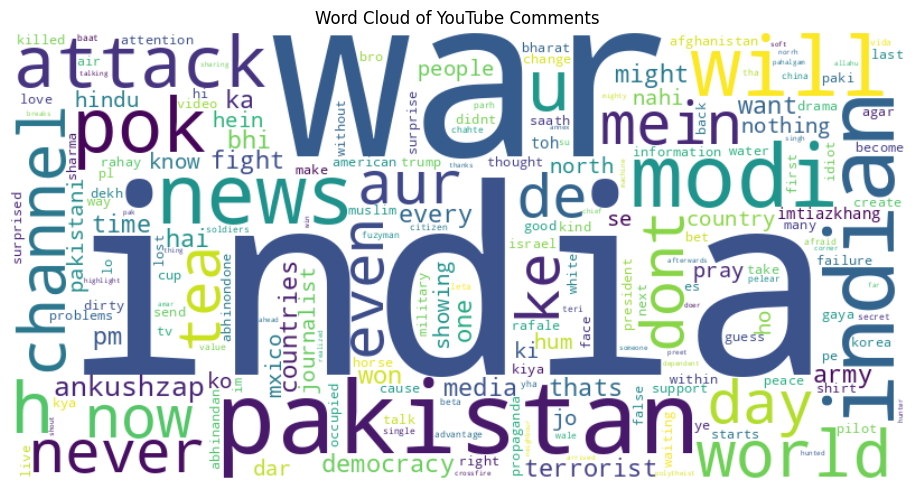

In [ ]:
text_all = " ".join(df['clean_text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of YouTube Comments")
plt.tight_layout()
plt.show()
